In [36]:
import pandas as pd
import seaborn as sns #data visualisation library
import matplotlib.pyplot as plt # allow me to plot the data
import numpy as np
import random


# Programming for Data Analysis Assignment

# Assignment Brief 
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.



# PROJECT SUBJECT

## In this project I will synthesize a dataset of the number of monthly prescription items dispensed per individual per month.

***

Variables 
* age, (non-negative real number)
* sex (m,f), (categorical)
* scheme type (gms, dps, pr), (categorical)
* smoker (yes, no) (categorical)

A useful reference article that discusses the pharmacy related data held by the HSE PCRS (Irish Health Service Executive-Primary Care Reimbursement Service) is the article [Pharmacoepidemiology resources in Ireland—an introduction to pharmacy claims data] (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5662670/) 

Link to the [HSE PCRS annual reports](https://www.sspcrs.ie/portal/annual-reporting/) 

The aricle by *Sinnott et al.* 2017 states that in 2015, almost 40% of the population (1.7 million people) were in receipt of public health insurance, or covered by the GMS scheme (known as medical card holders). Qualification for the GMS scheme is on the basis of income-related means-testing. According to the PCRS annual report this number was approx 30% or 1.5 million people at the end of 2021.

The remainder of the population not covered by the GMS scheme are referred to as being in the “private” tier. Individuals in the private health care system can receive government-subsidised access to prescription medications through the DP scheme. Under the DP scheme, an individual or a family is responsible for paying up to €80 per month for their medications. In 2014, 29% of the population accessed medication under this scheme [1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5662670/). According to the PCRS annual report 38.2% of the population accessed medication through the GMS or the LTI (Long Term Illness) scheme.6.16% of the population used the DP scheme (308,000 people)


An article published in [Real World Analytics pharmacy](https://www.realworldanalytics.com/pharmacy/en-ie/news/its-time-for-the-irish-healthcare-industry-to-step-into-the-data-driven-era/) which discusses the lack of available data from pharmacies in 2017 has indicated that the simulating of a dataset based on the availabilty of  Irish healthcare data may be hindered due to the Irish healtcare system publishing out of date and summarised data in comparison to, for example, the UK which through thr NHS publish payment data in its entirety about how each pharmacy and has performed each month. 

In Ireland, there are over 1,800 community pharmacies with the typical patient visiting a community pharmacy 19 times a year.

Data sources
    A number of different types of data can be used in analyses of medicine utilization and expenditure. Data sources are divided into aggregated data and patient-level data. Aggregated data sets are those where the data are compiled as a summary statistic. For example, the number of units of stock of a medicine purchased each month or each year. Aggregated data do not include information on the provision of medicines to an individual person. Patient-level data are those where
information on individual patients is available.
[Methods to analyse medicine utilization and expenditure
to support pharmaceutical policy implementation](https://apps.who.int/iris/bitstream/handle/10665/274282/9789241514040-eng.pdf)

In planning an analysis, it worth considering what measure of medicine use is required. Measures of medicine use can include an assessment of the amount of medicine procured, prescribed, supplied or used. The unit of measurement can include counts, volume or cost, and all of these units can be expressed as rates. The relevant population is commonly used as the denominator where rates are calculated.
Another consideration for determining what analyses to undertake is the data set available. Many of the key questions to support pharmaceutical policy can be answered using aggregated data, particularly where the data are available for the whole programme or where the data sample is representative of the programme. Some questions can only be answered using patientlevel data and so cannot be answered if only aggregated data sets are available. 

From the [PCRS Annual reporting website](https://www.sspcrs.ie/analytics/saw.dll?PortalPages) I have saved the data of the number of items claimed per pharmacy for 2021 as csv file to examine the distibuution so that I can simulate the data


# **Dispensing data**  
**Description:** Data on licensed medicines supplied to a patient by a dispensing officer (pharmacist or a doctor in  dispensing practice).
    
**Potential data sources:**
* pharmacies,
* medicine outlets or doctor dispensing practice records
(electronic or manual form).
  Where reimbursement of dispensing occurs, centralized data might be held by the payer (i.e. private insurer or government).
  
**Information usually available:**
* patient identifier,
* name of medicine dispensed,
* dosage form,
* strength,
* quantity of medicines dispensed,
* cost of each medicine dispensed.

**Advantages:** There is often a legal requirement to document dispensing, thus data are usually recorded at the patient level. The data might include overthe-counter medicines and medicines supplied by a pharmacist that do not require a prescription from a physician but do require a dispensing record.A routine audit of all medicines dispensed by a representative sample of pharmacies in a country will provide a comprehensive database of all types of medicines.
**Limitations:** The quantity of medicines dispensed will be subject to availability and this may vary depending on the procurement practice. In many instances, the data do not contain information about the problem, condition or diagnosis for which the medicines are dispensed, however, this is available in some data sets. Data may or may not be able to be linked to a prescriber.The data do not take into account compliance with therapy, thus dispensing data may not reflect the actual use (consumption) of medicines

***

# **Health claims data**
**Description:** Health claims data for medicines that are subsidized or reimbursed by the government or private insurers.
  
**Potential data sources:**
  - data held in either electronic or paper form by insurersmor agencies subsidizing medicine costs; insurers maymbe private health insurance companies or government agencies.

**Information usually available:**
* name of medicine,
* dosage form,
* strength,
* quantity of medicine dispensed,
* cost of each medicine dispensed.

**Advantages:** The data provide information about aggregated medicine utilization for the insured population. Data may allow analyses at different levels of the health system (e.g. regional, national or individual). While not included in all data sets, some contain unique patient identifiers enabling patient-level analyses to be done.

**Limitations:** The data are collected for administrativepurposes and thus may not include all relevant information for studies on medicine utilization. Data do not usually include over-the-counter medicines or prescribed medicines that are not subsidized or reimbursed. There are no data on medicines prescribed but never dispensed. The data are limited to the people covered by the subsidy or reimbursement programme, thus those segments of the population that are not covered by the programme are excluded. The databases do not capture information on medicines that are not covered by the subsidy or reimbursement programme.

***


In [37]:
#testing import of the items per claim form
import csv

filename = "Analysis_Number_of_Items_per_Claim_Form.csv"

with open(filename, "rt") as csvfile:
    csvReader = csv.reader(csvfile,delimiter=",")
    for line in csvReader:
        print (line[2]) #testing if I can extract the data from the Analysis_Number_of_Items_per_Claim_Form csv that I downloaded and saved into this jupyter notebook


ITEM_DESC
1
2
3
4
5
6
7
8+


In [38]:
#To create a text file that has removed the commas
txt_file = "Analysis_Number_of_Items_per_Claim_Form.txt"
text_list = []

with open(filename, "r") as my_input_file:
    for line in my_input_file:
        line = line.split(",", 5) #This CSV file contains 
        text_list.append(" ".join(line))

with open(txt_file, "w") as my_output_file:
    my_output_file.write("#1\n")
    my_output_file.write("double({},{})\n".format(len(text_list), 5))
    for line in text_list:
        my_output_file.write("  " + line)
    print('File Successfully written.')

File Successfully written.


In [39]:
NoOfItems_df=pd.read_csv("Analysis_Number_of_Items_per_Claim_Form.csv")
print (NoOfItems_df)

     YR SCHEME ITEM_DESC  TOTAL_CLAIMS   PERC  REPORT_ORDER
0  2021    GMS         1       7484226  40.69             1
1  2021    GMS         2       3168107  17.22             2
2  2021    GMS         3       1785109   9.70             3
3  2021    GMS         4       1255472   6.83             4
4  2021    GMS         5       1003850   5.46             5
5  2021    GMS         6        847085   4.61             6
6  2021    GMS         7        691107   3.76             7
7  2021    GMS        8+       2159518  11.74             8


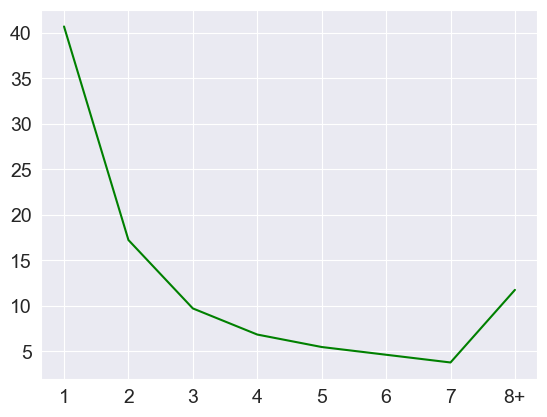

In [40]:
y = NoOfItems_df["PERC"]
x = NoOfItems_df["ITEM_DESC"]
plt.plot(x, y, color = "green")


Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions [1](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random).


['8+' '6' '2' '7' '3' '5' '3' '8+' '7' '1' '3' '6' '6' '2' '3' '7' '2'
 '8+' '5' '8+']


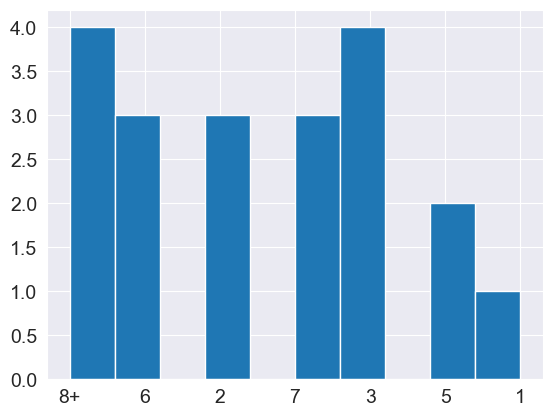

In [41]:
#For my synthesized dataset I want to simulate the no. of items per claim form as reported in the PCRS Annual report using 
# random.Generator from NumPy
rng = np.random.default_rng()
No_of_items_dispensed = ["1","2","3","4","5","6","7","8+"] 
results = rng.choice(No_of_items_dispensed, size=20)# asking for results to choose from the eight options and giving the first 20 random choices simulating 20 customers
print(results)
plt.hist(results)
plt.show()


We can see above that all the options have appeared from the Number of items dispensed list but the option for "one" which represents >40 of the no. of items dispensed appeared only twice when I ran the code and "seven" items appeared 3 times out of the 20 customers, which is approx 15% when the actual data from PCRS says that 7 items per transaction accounts for 3.76%.
 
The synthesised data from random choices needs to be weighted which I will do using the rounded percentages for each item from the PCRS data

['2' '2' '2' '4' '1' '2' '2' '6' '5' '3' '2' '8+' '8+' '6' '2' '6' '3' '1'
 '2' '1']


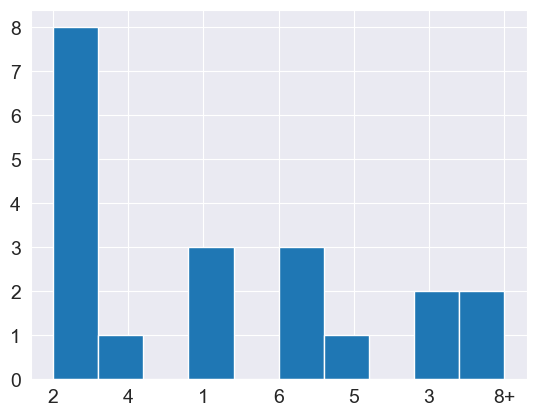

In [42]:
results = rng.choice(No_of_items_dispensed, size=20, p=[0.41, 0.17, 0.09, 0.07, 0.05, 0.05, 0.04, 0.12]) 
# asking for results to choose from the eight options and giving the first 20 random choices simulating 20 customer
print(results)
plt.hist(results)
plt.show()

The resulting synthesized data now more closely resembles the actual dispensing rates as published by the PCRS

['8+' '4' '5' '1' '6' '6' '6' '1' '1' '5' '1' '7' '1' '5' '8+' '1' '1' '1'
 '6' '4' '1' '1' '2' '7' '2' '8+' '2' '5' '4' '1' '1' '1' '1' '1' '2' '4'
 '6' '2' '8+' '2' '1' '5' '8+' '1' '1' '8+' '7' '1' '5' '7' '5' '4' '2'
 '3' '6' '2' '7' '4' '1' '2' '3' '1' '1' '2' '8+' '1' '3' '1' '5' '2' '8+'
 '1' '3' '1' '2' '7' '4' '7' '1' '1' '1' '1' '5' '1' '1' '1' '1' '3' '1'
 '2' '1' '8+' '1' '2' '1' '1' '1' '1' '1' '6']


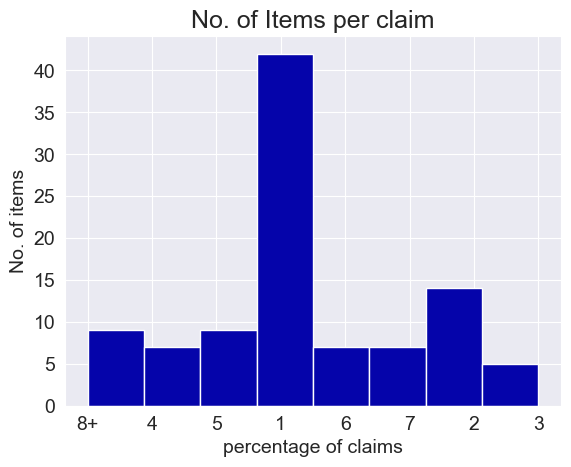

In [43]:
#scaling up to 100 datapoints and setting a seed for generating the random number so that I can see the effect of the introduced variables down the line
random.seed (2)
results = rng.choice(No_of_items_dispensed, size=100, p=[0.41, 0.17, 0.09, 0.07, 0.05, 0.05, 0.04, 0.12]) # asking for results to choose from the eight options and giving the first 20 random choices simulating 20 customer
print(results)
#plt.hist(results)
#plt.show()

# An "interface" to matplotlib.axes.Axes.hist() method from https://realpython.com/python-histograms/
n, bins, patches = plt.hist(x=results, bins='auto', color='#0504aa',
                            alpha=1, rwidth=1.85)
plt.grid(axis='y', alpha=1)
plt.xlabel('percentage of claims')
plt.ylabel('No. of items')
plt.title('No. of Items per claim')

maxfreq = n.max()


# RESEARCH AND ANALYSIS OF CHOSEN VARIABLES

One of the variables I thought that might impact on the monthly number of dispensed items was the season. I assumeD that with cold and flus that the winter months would have increased numbers of items dispensed however the graph below generated from data a retrospective observational study using population-scale, individual-level dispensing records in Wales,UK of the pre-covid and covid dispensing rate seems to refute that hypothesis with peak dispensing occuring in mid to late spring and no signifcant changes occuring from summer to winter either pre-covid or through covid. 
    The article does go on to show shifts in the types of items dispensed with large increases in March 2020 for cardiovascular disease medicines and central nervous system medications across all age groups, however the Immunologicaland Vaccine products dropped to very low levels across all age groups and all months as pharmacy dispensed vaccinations were largely associated with travel to foreign currents which was no longer an option during covid. It may be the case that large peaks are not observed because the system is running close to maxium capacity or it may simply be the case that the season does not have an impact on dispensing. Regardless, I will not include month or season in my simulated dataset as it appears to have an insignificant effect on the actual number of dispensed items.

Total number of dispensed items per month of the year and relative changes -in 2020 & 2021 vs 2019 Impact of COVID-19 pandemic on community medication dispensing: a national cohort analysis in Wales, UK - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020_fig2_360257846 [accessed 26 Nov, 2022))

<a href="https://www.researchgate.net/figure/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020_fig2_360257846"><img src="https://www.researchgate.net/publication/360257846/figure/fig2/AS:1165455603568648@1654877677452/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020.ppm" alt="Total number of dispensed items per month of the year and relative changes -in 2020 & 2021 vs 2019"/></a>

Other variables that I will examine are the impact of age and sex, scheme classification and smoking classification.

# AGE
  
Ageing populations lead to  rising polypharmacy (five or more regular medicines prescribed) associated with an increased risk of medication-related harm amongst older people.  In Ireland, the proportion of adults aged ≥ 65 years with polypharmacy increased from 17.8% to 60.4% between 1997 and 2012 [2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5662670/).
A potentially useful resource for accessing information and datasets related to aging is the The Irish Longitudinal study on Ageing (TILDA) data which can be accessed from the following site: [Irish Social Science Data Archive (ISSDA) at University College Dublin](http://www.ucd.ie/issda/data/tilda/). TILDA collects information on all aspects of health, economic and social circumstances from adults aged 50 years and over resident in Ireland. Waves of data collection take place every two years.
From the central statistics office databases related to census information can be accessed. From the database of the estimated population of ireland by age group
https://data.cso.ie/table/PEA04 I have downloaded a csv file called population by age to see what shape the data takes

In [44]:
import csv

filename = "population by age group.csv"

with open(filename, "rt") as csvfile:
    csvReader = csv.reader(csvfile,delimiter=",")
    for line in csvReader:
        print (line[2]) #testing if I can extract the data from the Analysis_Number_of_Items_per_Claim_Form csv that I downloaded and saved into this jupyter notebook


Age Group
0 - 4 years
0 - 4 years
0 - 4 years
5 - 9 years
5 - 9 years
5 - 9 years
10 - 14 years
10 - 14 years
10 - 14 years
15 - 19 years
15 - 19 years
15 - 19 years
20 - 24 years
20 - 24 years
20 - 24 years
25 - 29 years
25 - 29 years
25 - 29 years
30 - 34 years
30 - 34 years
30 - 34 years
35 - 39 years
35 - 39 years
35 - 39 years
40 - 44 years
40 - 44 years
40 - 44 years
45 - 49 years
45 - 49 years
45 - 49 years
50 - 54 years
50 - 54 years
50 - 54 years
55 - 59 years
55 - 59 years
55 - 59 years
60 - 64 years
60 - 64 years
60 - 64 years
65 - 69 years
65 - 69 years
65 - 69 years
70 - 74 years
70 - 74 years
70 - 74 years
75 - 79 years
75 - 79 years
75 - 79 years
80 - 84 years
80 - 84 years
80 - 84 years
85 years and over
85 years and over
85 years and over
All ages
All ages
All ages


In [45]:
#from https://pandas.pydata.org/docs/user_guide/10min.html#importing-and-exporting-data and making the data in a dataframe

df = pd.read_csv("population by age group.csv")
df

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2022,0 - 4 years,Both sexes,State,Thousand,301.7
1,Estimated Population (Persons in April),2022,0 - 4 years,Male,State,Thousand,154.2
2,Estimated Population (Persons in April),2022,0 - 4 years,Female,State,Thousand,147.5
3,Estimated Population (Persons in April),2022,5 - 9 years,Both sexes,State,Thousand,332.9
4,Estimated Population (Persons in April),2022,5 - 9 years,Male,State,Thousand,170.6
5,Estimated Population (Persons in April),2022,5 - 9 years,Female,State,Thousand,162.3
6,Estimated Population (Persons in April),2022,10 - 14 years,Both sexes,State,Thousand,366.3
7,Estimated Population (Persons in April),2022,10 - 14 years,Male,State,Thousand,187.2
8,Estimated Population (Persons in April),2022,10 - 14 years,Female,State,Thousand,179.1
9,Estimated Population (Persons in April),2022,15 - 19 years,Both sexes,State,Thousand,332.5


In [46]:
bothdf = df.iloc[3:54:3]
bothdf

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
3,Estimated Population (Persons in April),2022,5 - 9 years,Both sexes,State,Thousand,332.9
6,Estimated Population (Persons in April),2022,10 - 14 years,Both sexes,State,Thousand,366.3
9,Estimated Population (Persons in April),2022,15 - 19 years,Both sexes,State,Thousand,332.5
12,Estimated Population (Persons in April),2022,20 - 24 years,Both sexes,State,Thousand,318.8
15,Estimated Population (Persons in April),2022,25 - 29 years,Both sexes,State,Thousand,299.6
18,Estimated Population (Persons in April),2022,30 - 34 years,Both sexes,State,Thousand,318.3
21,Estimated Population (Persons in April),2022,35 - 39 years,Both sexes,State,Thousand,369.3
24,Estimated Population (Persons in April),2022,40 - 44 years,Both sexes,State,Thousand,412.9
27,Estimated Population (Persons in April),2022,45 - 49 years,Both sexes,State,Thousand,371.3
30,Estimated Population (Persons in April),2022,50 - 54 years,Both sexes,State,Thousand,332.6


In [47]:
#the above df contains male, female and all data, to seperate out the data I will create 3 new dataframes, one for male one for female and one for both
maledf = df.iloc[1:55:3]

maledf

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
1,Estimated Population (Persons in April),2022,0 - 4 years,Male,State,Thousand,154.2
4,Estimated Population (Persons in April),2022,5 - 9 years,Male,State,Thousand,170.6
7,Estimated Population (Persons in April),2022,10 - 14 years,Male,State,Thousand,187.2
10,Estimated Population (Persons in April),2022,15 - 19 years,Male,State,Thousand,169.5
13,Estimated Population (Persons in April),2022,20 - 24 years,Male,State,Thousand,161.2
16,Estimated Population (Persons in April),2022,25 - 29 years,Male,State,Thousand,150.7
19,Estimated Population (Persons in April),2022,30 - 34 years,Male,State,Thousand,156.2
22,Estimated Population (Persons in April),2022,35 - 39 years,Male,State,Thousand,175.8
25,Estimated Population (Persons in April),2022,40 - 44 years,Male,State,Thousand,200.0
28,Estimated Population (Persons in April),2022,45 - 49 years,Male,State,Thousand,182.5


In [48]:
femaledf = df.iloc[2:53:3]
femaledf

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
2,Estimated Population (Persons in April),2022,0 - 4 years,Female,State,Thousand,147.5
5,Estimated Population (Persons in April),2022,5 - 9 years,Female,State,Thousand,162.3
8,Estimated Population (Persons in April),2022,10 - 14 years,Female,State,Thousand,179.1
11,Estimated Population (Persons in April),2022,15 - 19 years,Female,State,Thousand,163.0
14,Estimated Population (Persons in April),2022,20 - 24 years,Female,State,Thousand,157.6
17,Estimated Population (Persons in April),2022,25 - 29 years,Female,State,Thousand,148.9
20,Estimated Population (Persons in April),2022,30 - 34 years,Female,State,Thousand,162.1
23,Estimated Population (Persons in April),2022,35 - 39 years,Female,State,Thousand,193.5
26,Estimated Population (Persons in April),2022,40 - 44 years,Female,State,Thousand,212.9
29,Estimated Population (Persons in April),2022,45 - 49 years,Female,State,Thousand,188.8


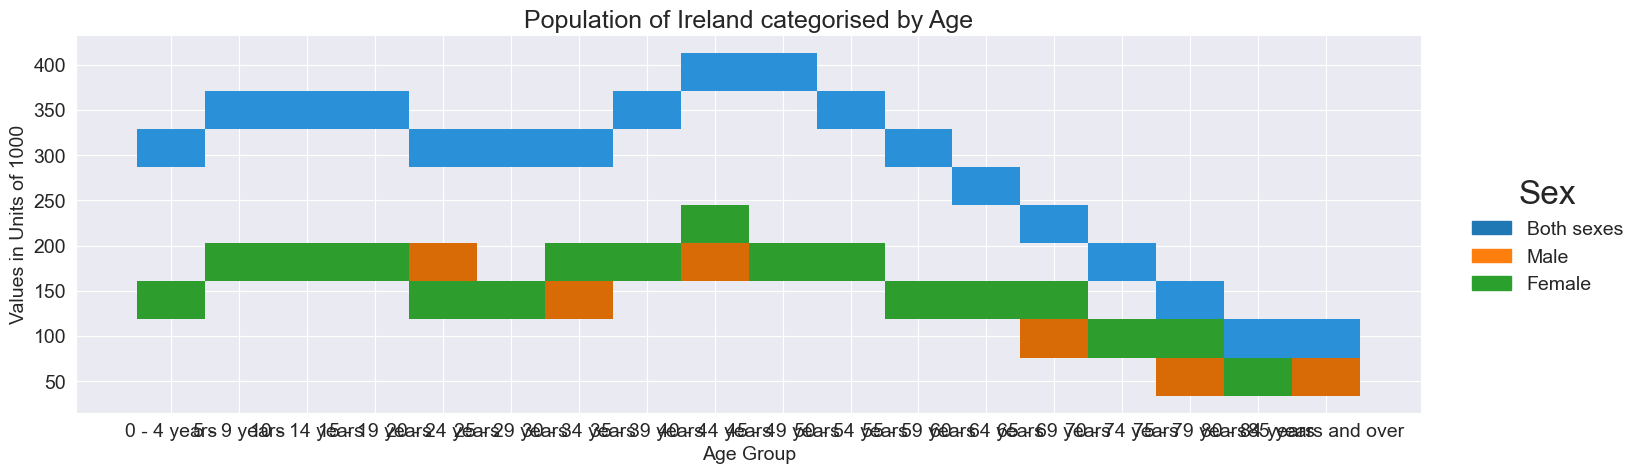

In [49]:
#get rid of accumulated data in the first df (last 3 rows)
df = df.iloc[0:53]
#using seaborn to visualise the distribution of the population across the age categories [4](https://seaborn.pydata.org/tutorial/distributions.html)
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
#sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
g = sns.displot(df, x="Age Group", y="VALUE", hue="Sex",height=5, aspect=3.0)
g.set(xlabel="Age Group", ylabel="Values in Units of 1000")
plt.title('Population of Ireland categorised by Age')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=24)          # controls default text sizes
plt.show()


The graph of the population of Ireland by age shows for both sexes that the age groups with the highest proportion of the population currently are those aged between 40 to 50 years old the age categories between 4 and 40 are reasonably uniform and from 60 on onwards there is a sharp decline in the precentage of the population in each of the age groupings. This graph is a bit hard to read especially with the way the age categories meld into one another 

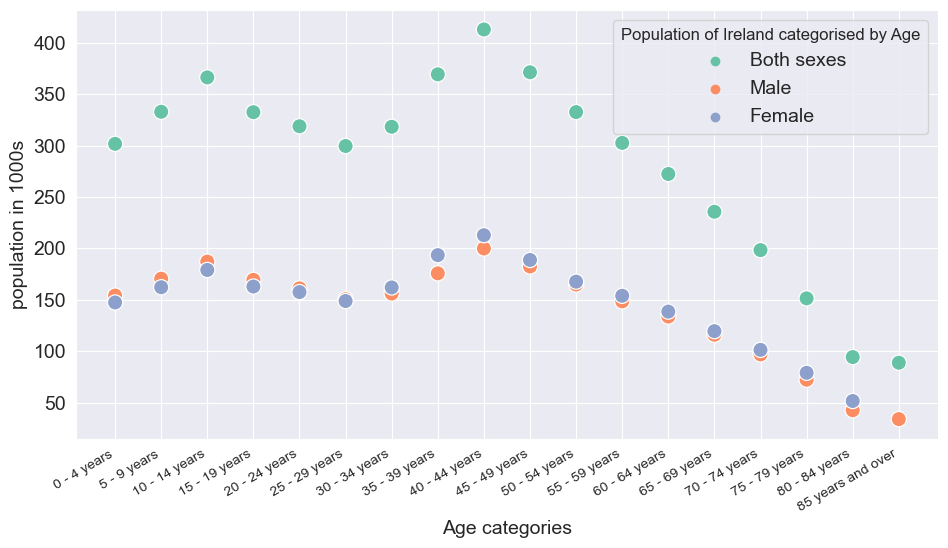

In [50]:
#Replot of above graph with improved visual aesthetics
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='Age Group', y='VALUE',   hue='Sex', palette='Set2', s=120)
ax.set(xlabel='Age categories', ylabel='population in 1000s')
for label in ax.get_xticklabels(): #to put the x tick labels on an angle
  label.set_rotation(30)
  label.set_ha('right')
ax.legend(title='Population of Ireland categorised by Age', title_fontsize = 12) 
plt.show()
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
#plt.rc('font', size=24)          # controls default text sizes



['1-10' '31-40' '1-10' '31-40' '81-90' '71-80' '31-40' '1-10' '81-90'
 '41-50' '61-70' '31-40' '41-50' '81-90' '41-50' '31-40' '61-70' '1-10'
 '41-50' '11-20' '61-70' '1-10' '41-50' '11-20' '51-60' '11-20' '1-10'
 '61-70' '11-20' '51-60' '11-20' '11-20' '1-10' '61-70' '21-30' '1-10'
 '71-80' '21-30' '11-20' '11-20' '1-10' '1-10' '1-10' '61-70' '11-20'
 '71-80' '21-30' '51-60' '41-50' '1-10' '11-20' '11-20' '11-20' '21-30'
 '51-60' '1-10' '1-10' '31-40' '11-20' '41-50' '51-60' '11-20' '31-40'
 '81-90' '31-40' '1-10' '41-50' '11-20' '31-40' '81-90' '21-30' '41-50'
 '31-40' '31-40' '1-10' '51-60' '31-40' '41-50' '31-40' '81-90' '41-50'
 '1-10' '21-30' '61-70' '11-20' '31-40' '41-50' '21-30' '51-60' '11-20'
 '31-40' '41-50' '21-30' '1-10' '51-60' '51-60' '31-40' '61-70' '51-60'
 '21-30']


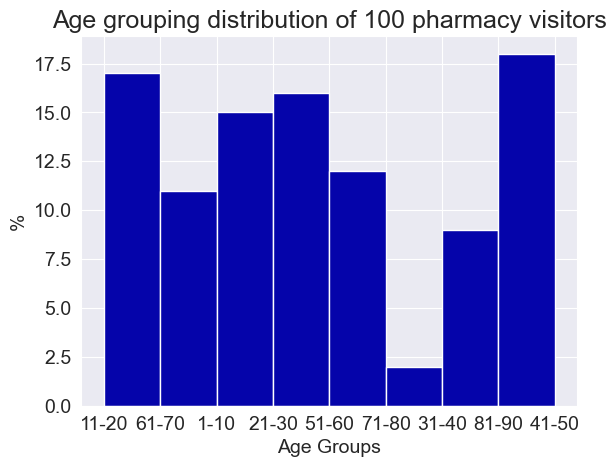

In [61]:
#using the above dataset to train my model to generate 100 ages using the actual distribution of ages in Ireland
#after spending along time trying to figure out a distribution in NumPy that would sucessfully describe the age of the population 
# I was unsucessful. I think the best I can aim to do is try to write code that generates number from 0-50 with equal probablities and then
#with decreasing probailities for the ages from 50-85

rng = np.random.default_rng()
Age= ["1-10", "11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90"] 
Age_group_results = rng.choice(Age, size=100, p=[0.14, 0.14, 0.14, 0.14, 0.14, 0.11, 0.09, 0.06, 0.04])# asking for results to choose from the eight options and giving the first 20 random choices simulating 20 customers
print(Age_group_results)

n, bins, patches = plt.hist(x=results, bins='auto', color='#0504aa',
                            alpha=1, rwidth=1.85)
plt.grid(axis='y', alpha=1)
plt.xlabel('Age Groups')
plt.ylabel('%')
plt.title('Age grouping distribution of 100 pharmacy visitors')

maxfreq = n.max()



# EFFECT/IMPACT OF AGE ON THE NUMBER OF PRESCRIPTIONS DISPENSED

As the below infographic clearly demonstrates there is a steady increase up through the age groups in the number of prescribed medicines that people take in the UK. For the 16-24 bracket, 19 percent were taking at least one medicine that had been prescribed to them. For those aged 85 and older, this rises to 96 percent, with 56 percent taking at least five medicines [5](https://www.statista.com/chart/20056/prescription-medicine-by-age-group-england/).

In Ireland, one-in-three people over the age of 65 take five or more daily medications.

<a href="https://www.statista.com/chart/20056/prescription-medicine-by-age-group-england/" title="Infographic: With age comes wisdom (and prescriptions) | Statista"><img src="https://cdn.statcdn.com/Infographic/images/normal/20056.jpeg" alt="Infographic: With age comes wisdom (and prescriptions) | Statista" width="100%" height="auto" style="width: 100%; height: auto !important; max-width:960px;-ms-interpolation-mode: bicubic;"/></a> Ref <a href="https://www.statista.com/chartoftheday/">Statista</a>


In [52]:
#re-creating the above data in a dataframe
#ref. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
  
  
# List1
Age_Group = ['15-24', '25-34', '35-49', '50-64', '65+']
# List2
one_or_two_medicines = [16, 18, 22, 28, 29, 27, 22, 15]
#list 3
three_or_four_medicines = [2, 2.5, 4.5, 10, 15, 18, 23, 25]
#list 4
five_plus_medicines = [0.5, 1, 3, 7, 17, 35, 40, 50]
# get the list of tuples from 4 lists and merge them by using zip().
list_of_tuples = list(zip(Age_Group, one_or_two_medicines, three_or_four_medicines, five_plus_medicines))

# Assign data to tuples.
list_of_tuples


# Converting lists of tuples into
# pandas Dataframe.
prescriptionsbyagedf = pd.DataFrame(list_of_tuples,)
columns=['Age_Group', 'one_or_two_medicines', 'three_or_four_medicines','five_plus_medicines ']

# Print data.
prescriptionsbyagedf


,0,1,2,3
0,15-24,16,2.0,0.5
1,25-34,18,2.5,1.0
2,35-49,22,4.5,3.0
3,50-64,28,10.0,7.0
4,65+,29,15.0,17.0


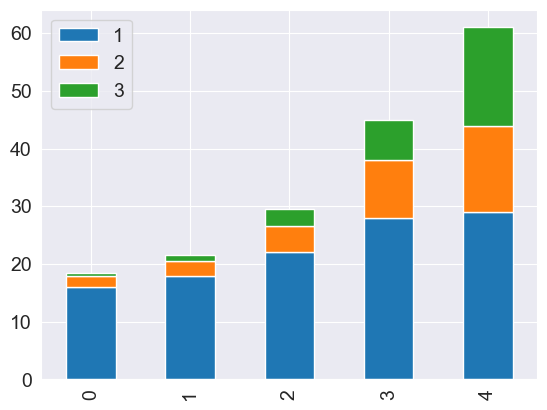

In [53]:
ax = prescriptionsbyagedf.plot.bar(stacked=True)


# Scheme type
While the PCRS publishes annual data on the dispensing of prescription items for which claims are submitted to the HSE (ie General Medical Services Scheme (GMS), Drugs Payment Scheme (DPS), Long Term Illness Scheme (LTI) and Dental Treatment Services Scheme (DTSS)). Data is not submitted for people that pay privately for prescriptions. Individuals in the private health care system can receive government-subsidised access to prescription medications through the DPS scheme. Under the DP scheme, an individual or a family is responsible for paying up to €80 per month for their medications. Once this limit is reached, the individual or family incurs no further cost for the duration of the month. From personal experience working in a pharmacy I have found that most individuals in the private tier apply and are approved for DPS if their family prescriptions exceed  €80 month, therefore people that remain in the private tier for prescriptions are usually one receiving 3 or less items per month

As of 31st Decemeber 2021:

    1,545,222 of 5,011,500 (30.83% of the population) were in the GMS scheme
    308,665 of 5,011,500 (6.18% of the population) were in the DPS scheme
    195,064  of 5,011,500 (3.89% of the population) were in the LTI scheme. 
[3](https://www.sspcrs.ie/portal/annual-reporting/) 

In [54]:
#df of the scheme classification
# initialize data of lists.
data = {'Scheme': ['GMS', 'DPS', 'LTI', 'Private'],
        '% of population': [30.83, 6.18, 3.89, 59.1]}
  
# Create DataFrame
Schemedf= pd.DataFrame(data)
  
# Print the output.
Schemedf


,Scheme,% of population
0,GMS,30.83
1,DPS,6.18
2,LTI,3.89
3,Private,59.10


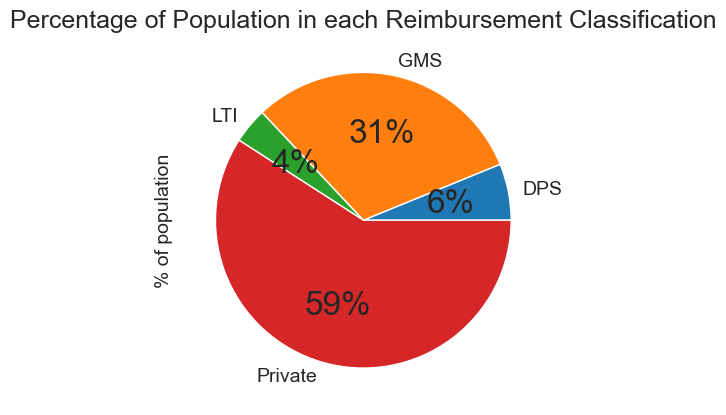

In [55]:
#plot = Schemedf.plot.pie(y='% of population', figsize=(10, 8), label="Scheme")
Schemedf.groupby(['Scheme']).sum().plot(kind='pie', y='% of population', legend=False, autopct='%1.0f%%')

plt.title('Percentage of Population in each Reimbursement Classification')

plt.show()

# Smoking

An extensive body of evidence exists to demonstrate the effects of tobacco use on almost every organ of the body. A study of smokers in Ireland found that people who smoke are more likely to self-report poor health; both poorer physical health and mental health.
* The prevalence of smoking-related chronic diseases is highest among ex-smokers; and among all people
who smoke, the prevalence of these diseases is related to the amount smoked.
* Many smokers experience limitations in activities of daily living as a result of their smoking, particularly in
later life and, again, the prevalence of limitations is related to the amount smoked.
* People who smoke are more likely to encounter healthcare services, at all age.
https://www.hse.ie/eng/about/who/tobaccocontrol/tobaccofreeireland/adult-smoking-in-ireland.pdf

Data from the HSE details an age profile of adult current smokers, ex-smokers and never smokers in Ireland in 2015.
The highest prevalence of current smoking at that time, among males and females, was in the 25-34 year age group. The
proportion of ex-smokers in each age group increased with increasing age group, with highest rates (43%) in
those aged 75+ years. The youngest age group (15-24 years) had the highest proportion (71%) of never smokers,
as expected. 


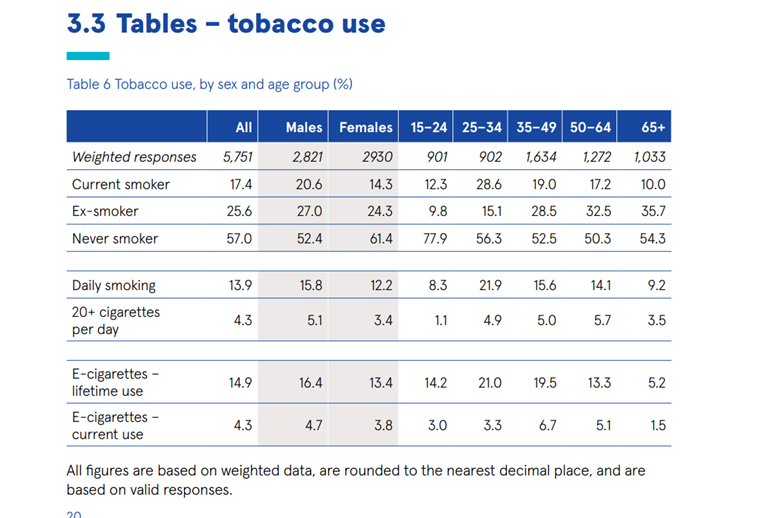 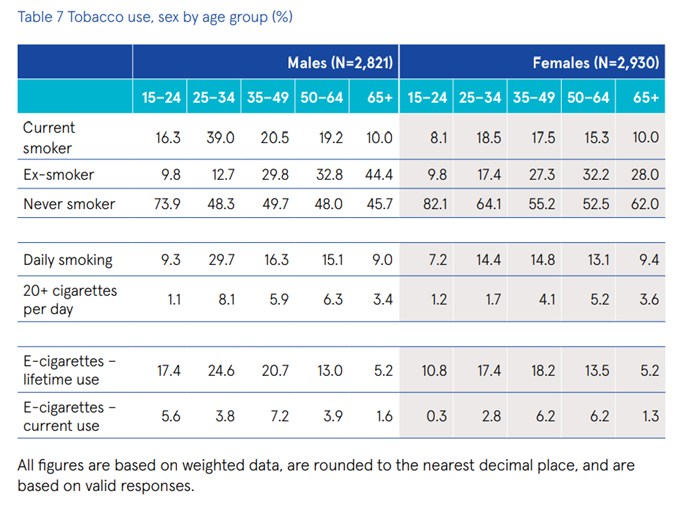
* Ref https://www.hse.ie/eng/about/who/tobaccocontrol/tobaccofreeireland/adult-smoking-in-ireland.pdf 


In [56]:
#making a df from the smoking data using the age groups and the percentage that are current smokers


# Python code demonstrate creating DataFrame from dict narray / lists by default addresses.
#ref. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
  
# initialize data of lists.
data = {'Age Group': ['15-24', '25-34', '35-49', '50-64', '65+'],
        '% daily smokers all': [12.3, 28.6, 20.5, 19.2, 10]}
  
# Create DataFrame
smokersdf = pd.DataFrame(data)
  
# Print the output.
smokersdf

,Age Group,% daily smokers all
0,15-24,12.3
1,25-34,28.6
2,35-49,20.5
3,50-64,19.2
4,65+,10.0


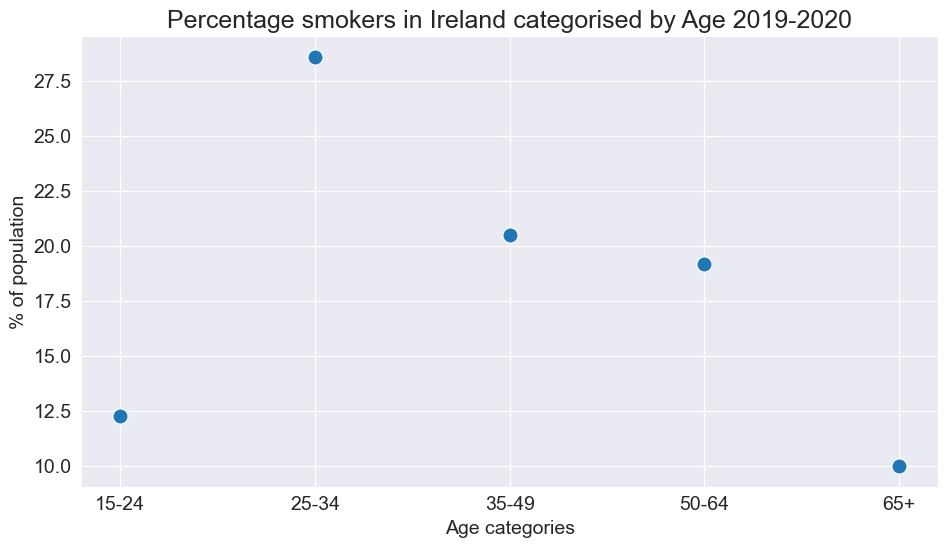

In [57]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=smokersdf, x='Age Group', y='% daily smokers all', palette='Set2', s=120)
ax.set(xlabel='Age categories', ylabel='% of population')
plt.title('Percentage smokers in Ireland categorised by Age 2019-2020')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('font', size=24)          # controls default text sizes
plt.show()

In [58]:
# Python program to demonstrate creating
# pandas Datadaframe from lists using zip.

# List1
Age_Group = ['15-24', '25-34', '35-49', '50-64', '65+']
# List2
Daily_smokers_all = [12.3, 28.6, 20.5, 19.2, 10]
#list 3
Daily_smokers_male = [16.3, 39, 19, 17.2, 10]
#list 4
Daily_smokers_female = [8.1, 18.5, 17.5, 15.3, 10]
# get the list of tuples from 4 lists and merge them by using zip().
list_of_tuples = list(zip(Age_Group, Daily_smokers_all, Daily_smokers_male, Daily_smokers_female))

# Assign data to tuples.
list_of_tuples


# Converting lists of tuples into
# pandas Dataframe.
smokersmalefemaledf = pd.DataFrame(list_of_tuples,
columns=['Age_Group', 'Daily_smokers', 'Daily_smokers male', 'Daily_smokers female'])

# Print data.
smokersmalefemaledf






,Age_Group,Daily_smokers,Daily_smokers male,Daily_smokers female
0,15-24,12.3,16.3,8.1
1,25-34,28.6,39.0,18.5
2,35-49,20.5,19.0,17.5
3,50-64,19.2,17.2,15.3
4,65+,10.0,10.0,10.0


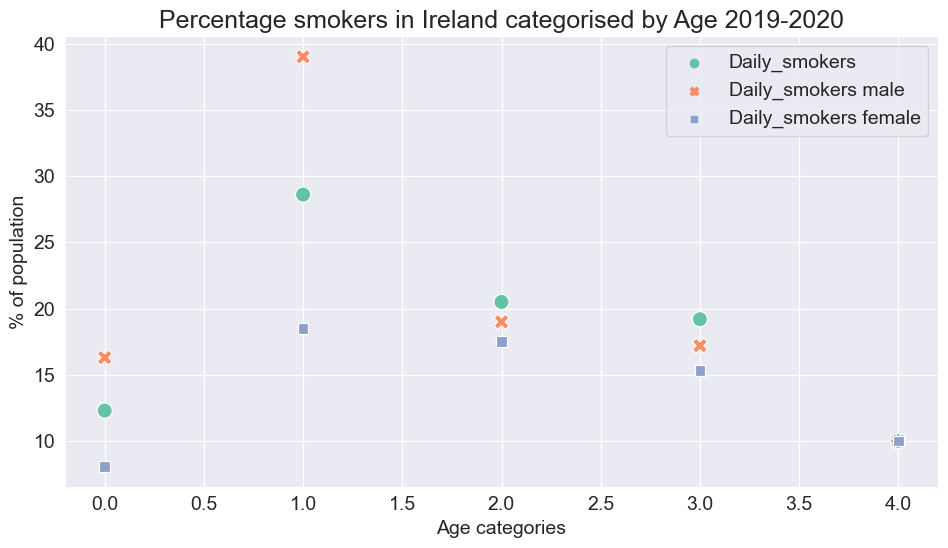

In [59]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=smokersmalefemaledf, palette='Set2', s=120)
ax.set(xlabel='Age categories', ylabel='% of population')
plt.title('Percentage smokers in Ireland categorised by Age 2019-2020')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('font', size=24)          # controls default text sizes
plt.show()

With pandas, you can merge, join, and concatenate your datasets, allowing you to unify and better understand your data as you analyze it
* .merge() for combining data on common columns or indices
* .join() for combining data on a key column or an index
* concat() for combining DataFrames across rows or columns

ref https://realpython.com/pandas-merge-join-and-concat/

# References 
   
* (https://www.projectpro.io/recipes/create-simulated-data-for-classification-in-python)
* https://discovery.cs.illihttps://www.drugsandalcohol.ie/34287/1/HRB_Irish_National_Drug_and_Alcohol_Survey_2019_20.pdfnois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/)
* Sinnott SJ, Bennett K, Cahir C. Pharmacoepidemiology resources in Ireland-an introduction to pharmacy claims data. Eur J Clin Pharmacol. 2017 Nov;73(11):1449-1455. doi: 10.1007/s00228-017-2310-7. Epub 2017 Aug 17. Erratum in: Eur J Clin Pharmacol. 2017 Nov;73(11):1457. PMID: 28819675; PMCID: PMC5662670.
* https://www.ucd.ie/issda/data/tilda/
* https://www.statista.com/chart/20056/prescription-medicine-by-age-group-england/
* The 2019–20 Irish National Drug and Alcohol Survey: main findings.
* Mongan, Deirdre and Millar, Sean and Galvin, Brian (2021) The 2019–20 Irish National Drug and Alcohol Survey: main findings. Dublin: Health Research Board.
* https://realpython.com/pandas-merge-join-and-concat/

https://www.youtube.com/watch?v=ioqCy-UmbNg